In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df= pd.read_csv('/content/Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [ ]:
Cuisines =df.Cuisines.value_counts()
Cuisines

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [ ]:
columns_sorted = Cuisines.sort_values(ascending=False)
columns_sorted

Cuisines
North Indian                                     936
North Indian, Chinese                            511
Chinese                                          354
Fast Food                                        354
North Indian, Mughlai                            334
                                                ... 
Cafe, Mexican, Italian, North Indian, Chinese      1
Continental, Mexican                               1
Continental, Chinese, Italian, Cafe                1
Hyderabadi, Biryani                                1
Italian, World Cuisine                             1
Name: count, Length: 1825, dtype: int64

In [ ]:
cuisine = df["Cuisines"]
cuisines_count = cuisine.value_counts()
Top_Cuisines = columns_sorted.head(3)
total = len(df)
percentage_of_Top_Cuisines = (Top_Cuisines/total)*100

In [ ]:
print("Top three Cuisines")
Top_Cuisines

Top three Cuisines


Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64

In [ ]:
plt.bar(percentage_of_Top_Cuisines.index, percentage_of_Top_Cuisines.values, color=['aqua'])
plt.xlabel("Cuisines")
plt.ylabel("Percentage of top Cuisines")
plt.title("the top three most common cuisines  ")
plt.show()

In [ ]:
Restaurants = df['Restaurant Name'].count()
Restaurants


9551

In [ ]:
total_restaurants =len(df)
cuisine_percentage = Top_Cuisines/Restaurants*100

In [ ]:
print("Percentage of Restaurant that serve top three cuisines")
print(cuisine_percentage)

Percentage of Restaurant that serve top three cuisines
Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64


Task_2


In [29]:
df['Restaurant ID'].unique()

array([6317637, 6304287, 6300002, ..., 5915807, 5916112, 5927402])

In [30]:
city_restaurantcount = df.groupby('City')['Restaurant Name'].count()
city_restaurantcount

City
Abu Dhabi          20
Agra               20
Ahmedabad          21
Albany             20
Allahabad          20
                   ..
Weirton             1
Wellington City    20
Winchester Bay      1
Yorkton             1
��stanbul          14
Name: Restaurant Name, Length: 141, dtype: int64

In [31]:
city_with_highest_no_of_restaurants = city_restaurantcount.idxmax()
highest_restaurant_count = city_restaurantcount.max()

In [32]:
print("The city with highest no of restaurant:", city_with_highest_no_of_restaurants,"with the number of restaurants", highest_restaurant_count)

The city with highest no of restaurant: New Delhi with the number of restaurants 5473


In [33]:
average_rating = df.groupby('City')['Aggregate rating'].mean()
print("Aggregate rating for restaurant in each city:",average_rating)

Aggregate rating for restaurant in each city: City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


In [34]:
city_with_highest_average_rating = average_rating.idxmax()
highest_average_rating = average_rating.max()

In [35]:
print("The city with highest average ratings:" , city_with_highest_average_rating, "with a rating of:", highest_average_rating)

The city with highest average ratings: Inner City with a rating of: 4.9


**Task_3**
***

In [37]:
price_range= df['Price range'].value_counts().sort_index()
total_restaurants = len(df)
percentageof_pricerange= (price_range/total_restaurants)*100

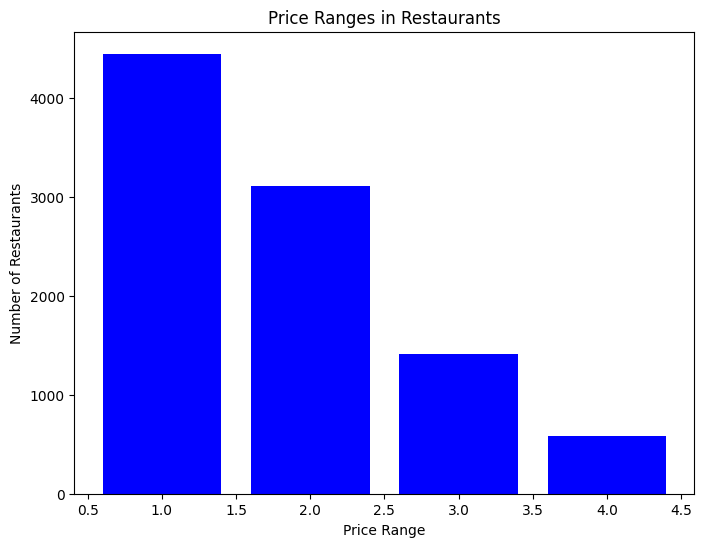

In [43]:
plt.figure(figsize=(8,6))
plt.bar(price_range.index, price_range.values, color=['blue'])
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Price Ranges in Restaurants')
plt.show()


In [48]:

print("Percentage in each price range category:")
print(percentageof_pricerange)

Percentage in each price range category:
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


**Task4**

In [50]:
total_restrnt =len(df)
restaurant_online_delivery = df['Has Online delivery'].value_counts().get('Yes',0)
percentage_online_delivery =(restaurant_online_delivery/total_restaurants)*100
print("Percentage of restaurant offers online delivery:", percentage_online_delivery)

Percentage of restaurant offers online delivery: 25.662234321013504


In [56]:
avgage_rating_online_delivery = df[df['Has Online delivery']== 'Yes']['Aggregate rating'].mean()
avgage_rating_not_online_delivery = df[df['Has Online delivery']== 'No']['Aggregate rating'].mean()


In [58]:
print("Average rating of resturant with online delivery", avgage_rating_online_delivery)
print("Average rating of resturant without online delivery", avgage_rating_not_online_delivery )

Average rating of resturant with online delivery 3.2488372093023257
Average rating of resturant without online delivery 2.465295774647887


In [59]:
labels =['With Online Delivery','Without Online Delivery']
average_rating =[avgage_rating_online_delivery, avgage_rating_not_online_delivery]

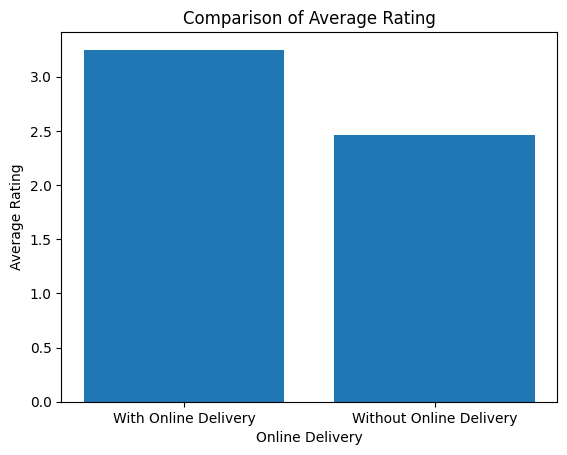

In [62]:
plt.bar(labels, average_rating)
plt.xlabel('Online Delivery')
plt.ylabel('Average Rating')
plt.title('Comparison of Average Rating')
plt.show()